<a href="https://colab.research.google.com/github/saudyusaf/data-science/blob/main/program18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
# Load the dataset
advertising = pd.read_csv('/content/Advertising.csv')
# Display the first few rows and basic info about the dataset
print(advertising.head())
print(advertising.describe())
print(advertising.info())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null 

In [4]:

# Separate the features (independent variables) and the target variable (dependent variable)
print("Feature values:")
x = advertising.iloc[:, :-1]  # Selects all columns except the last one as features
print(x)

Feature values:
     Unnamed: 0     TV  Radio  Newspaper
0             1  230.1   37.8       69.2
1             2   44.5   39.3       45.1
2             3   17.2   45.9       69.3
3             4  151.5   41.3       58.5
4             5  180.8   10.8       58.4
..          ...    ...    ...        ...
195         196   38.2    3.7       13.8
196         197   94.2    4.9        8.1
197         198  177.0    9.3        6.4
198         199  283.6   42.0       66.2
199         200  232.1    8.6        8.7

[200 rows x 4 columns]


In [5]:

print("Target variable values:")
y = advertising.iloc[:, -1]   # Selects the last column as the target

print(y)

Target variable values:
0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [6]:

# Split the dataset into training and testing sets (70% training, 30% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y,
test_size=0.3, random_state=42)

# Train the Multiple Linear Regression model
regressor = LinearRegression()
regressor.fit(x_train, y_train)
# Output the intercept and coefficients of the regression model
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)


Intercept: 2.6979623819843823
Coefficients: [1.01434702e-04 4.40581043e-02 1.99286432e-01 6.91829845e-03]


In [7]:

# Make predictions on the test set
y_pred = regressor.predict(x_test)
# Print actual vs predicted values for the test set
print("Actual vs Predicted values:")
for actual, predicted in zip(y_test, y_pred):
    print("Actual value:", actual, "Predicted value:", predicted)

Actual vs Predicted values:
Actual value: 16.9 Predicted value: 16.565817776073434
Actual value: 22.4 Predicted value: 21.180479699816786
Actual value: 21.4 Predicted value: 21.544402114689518
Actual value: 7.3 Predicted value: 10.895946744550951
Actual value: 24.7 Predicted value: 22.204221545892867
Actual value: 12.6 Predicted value: 13.358111881438733
Actual value: 22.3 Predicted value: 21.19371189401255
Actual value: 8.4 Predicted value: 7.3572322307216735
Actual value: 11.5 Predicted value: 13.282439424008283
Actual value: 14.9 Predicted value: 15.119073554819247
Actual value: 9.5 Predicted value: 9.010255271561872
Actual value: 8.7 Predicted value: 6.533996518335079
Actual value: 11.9 Predicted value: 14.310671572536906
Actual value: 5.3 Predicted value: 8.967585803961683
Actual value: 10.3 Predicted value: 9.465564463594141
Actual value: 11.7 Predicted value: 12.012665380758934
Actual value: 5.5 Predicted value: 8.911734611839382
Actual value: 16.6 Predicted value: 16.1609769963

In [8]:


# Calculate and print the number of mislabeled points
mislabeled_points = np.sum(np.round(y_test) != np.round(y_pred))
print("Number of mislabeled points from test data set:", mislabeled_points)

Number of mislabeled points from test data set: 47


In [9]:


# Calculate and print evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 1.512095509182971
Mean Squared Error: 3.7976466609670947
Root Mean Squared Error: 1.9487551567518928


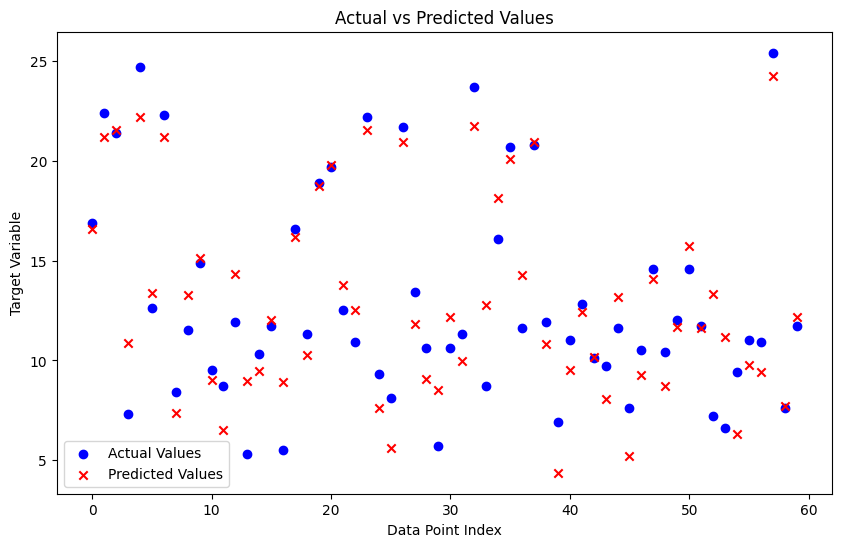

In [10]:


# Visualization of Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Point Index')
plt.ylabel('Target Variable')
plt.legend()
plt.show()